<a href="https://colab.research.google.com/github/ashish1401/Machine-Learning/blob/main/Logistic_Regression_aided_Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


About Dataset
1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: paragraph of the news article-could be incomplete
5. label: output prediction - real or fake






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re #regular expression used for searching the text data
from nltk.corpus import stopwords #natural language toolkit - corpus:important text from the paragraph stopwords: irrelevant words which do not add any value to the context of the text
from nltk.stem.porter import PorterStemmer #stemming:gives the root word of a word by removing prefix-suffix


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer #converts text into features
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english') # these words shall be stemmed during our model training

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
newsdf = pd.read_csv('/content/train.csv')


In [ ]:
newsdf.shape

(20800, 5)

In [ ]:
newsdf.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
newsdf.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
#counting missing values
newsdf.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

Since null data points are very less in number we do not require imputations

In [ ]:
newsdf = newsdf.fillna('')

In [ ]:
#merging the author name and news title
newsdf['content'] = newsdf['author'] +' '+ newsdf['title']

We will now be using the newly created Content feature to predict whether the news is fake or correct

In [ ]:
X = newsdf[['id','title','author','text','content']]
Y = newsdf['label']
Y.shape

(20800,)

Stemming : Reducing a word or a sentence to its root word to reduce the usage of redundant prefixes and suffixes

Example : actors,actress,acting ---> act

Vectorizing : after stemming we convert text data into features of numerical values and hence feed them to our numeric data

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  # stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  new_stemmed_content = []
  for word in stemmed_content:
    if(word not in stopwords.words('english')):
      new_stemmed_content.append(port_stem.stem(word))

  new_stemmed_content = ' '.join(new_stemmed_content) #join contents of string by using <Space> as a separator
  return new_stemmed_content

In [ ]:
newsdf['content'] = newsdf['content'].apply(stemming)

In [ ]:
newsdf['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [ ]:
X = newsdf['content'].values
Y = newsdf['label'].values
print(X)
print(Y)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]


TfidfVectorizer() is a class in scikit-learn (sklearn) that is used to convert a collection of raw documents (text data) into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents.


Term Frequency (TF): This measures the frequency of a term (word) in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in the document.

Inverse Document Frequency (IDF): This measures how important a term is across all documents in a corpus. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.

TF-IDF: This is the product of TF and IDF. It gives higher weight to terms that are frequent in a document but rare in the overall corpus.

In [ ]:
#convert text into machine understandable vector numbers
vectorizer =  TfidfVectorizer()
X=vectorizer.fit_transform(X)

In [ ]:
print(X[0])

  (0, 15686)	0.28485063562728646
  (0, 2483)	0.3676519686797209
  (0, 7692)	0.24785219520671603
  (0, 8630)	0.29212514087043684
  (0, 2959)	0.2468450128533713
  (0, 13473)	0.2565896679337957
  (0, 4973)	0.233316966909351
  (0, 267)	0.27010124977708766
  (0, 3792)	0.2705332480845492
  (0, 7005)	0.21874169089359144
  (0, 8909)	0.3635963806326075
  (0, 3600)	0.3598939188262559


Splitting the dataset

The stratify parameter in scikit-learn's train_test_split function is used to ensure that the class distribution in the target variable (usually used for classification tasks) is preserved in the train and test datasets. This is particularly useful when you have imbalanced classes in your dataset.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,stratify=Y,random_state=2)

No sense of using SAGA as 1. Data is medium in quantity 2. We not dealing with multiple features hence do not really need feature reduction as provided by L1 - LASSO regression

In [ ]:
lr = LogisticRegression()

SAGA (Stochastic Average Gradient Descent):

SAGA is a variant of the stochastic gradient descent algorithm designed to handle large datasets efficiently.
It's well-suited for problems with a large number of samples and features.
SAGA supports both "l1" and "l2" penalties and also allows for elastic net regularization.
It's generally slower than LBFGS for small to medium-sized datasets but can be more efficient for large datasets.
LBFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno):

LBFGS is a quasi-Newton optimization algorithm that approximates the BFGS algorithm but uses limited memory.
It's well-suited for problems with a small to medium number of samples.
LBFGS supports only "l2" or no penalty ("none").
It's typically faster than SAGA for small to medium-sized datasets but may not scale well to very large datasets due to its memory requirements.

10


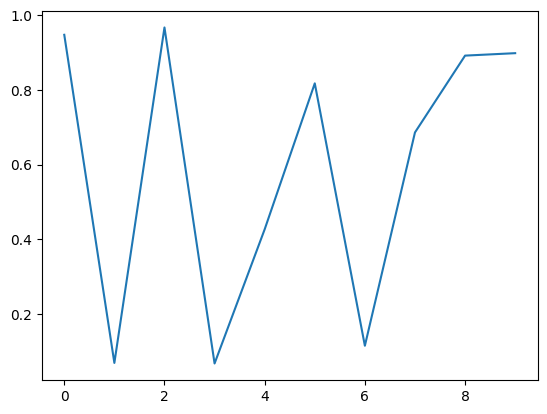

In [ ]:
lr =lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
# print(X_test.shape)
# print(y_pred)
# print(lr.predict_proba(X_test))
#we need a parameter or a metric that describes the text in terms of a single number
prob = lr.predict_proba(X_test)[0:10,1]
plt.plot(np.arange(lr.predict_proba(X_test)[0:10,1].shape[0]),prob)
print(prob.shape[0])
# lr.get_params(deep=True)

In [ ]:
accuracy_score(y_test,y_pred)

0.9790865384615385

Use different accuracy Metrics

Use CrossValidation

Fix Logistic Regression Graph

Mimic multiple feature LogisticRegression



